In [44]:
import pandas as pd
import numpy as np

In [45]:
Mile_DF = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', parse_dates=[0])

In [46]:
Mile_DF.shape

(96, 2)

In [47]:
Mile_DF.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


MilesMM - This column tells us the miles covered in millions.

In Jan 1963 the total miles covered were - 6827 million miles

### Line Chart

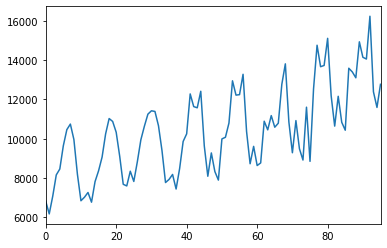

In [48]:
Mile_DF['MilesMM'].plot()

- We can see the positive trend. 
- Overall number of miles are increasing.
- We can see ups and dows at a constant interval of time, whcih indicates that there is some seasonal pattern.

### Trendline

In [49]:
import seaborn as sns

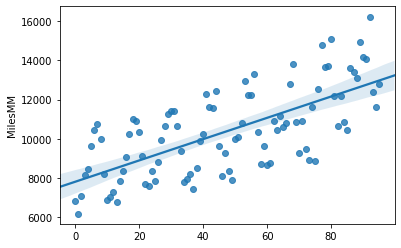

In [50]:
sns.regplot(x= Mile_DF.index.values, y=Mile_DF['MilesMM'])

- We can see the Ups and Downs in this Scatter plot as well.
- The positive slope of the trendline indicates that the number of miles are increasing over time.

### Let's remove the Seasonality from the data

##### To aggregate the data over year level we have to remove the effect of monthly seasonlaity

 ### Date time features

In [51]:
#Create a seperate year column
Mile_DF['year'] = Mile_DF['Month'].dt.year

In [52]:
Mile_DF.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


Create a mean of miles for 12 months for each year

In [54]:
Mile_Mean = Mile_DF.groupby('year')['MilesMM'].mean()

In [55]:
Mile_Mean.head()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
Name: MilesMM, dtype: float64

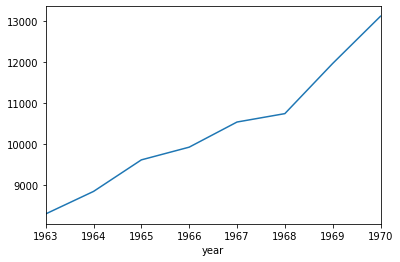

In [56]:
Mile_Mean.plot()

In this chart the seasonality has been removed

### Creating Lag plots

Lag values are important in forecasting because the values we want to forecast are dependent on previous values.

In [57]:
Mile_DF['lag1'] =  Mile_DF['MilesMM'].shift(1)

In [58]:
Mile_DF.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


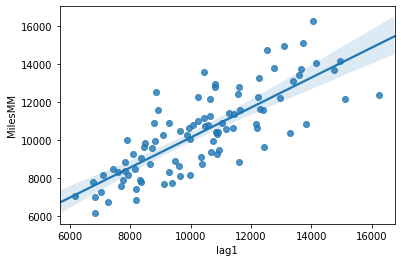

In [59]:
sns.regplot(x=Mile_DF['lag1'], y=Mile_DF['MilesMM'])

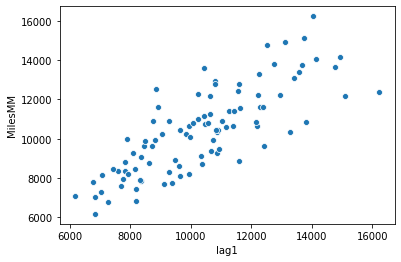

In [60]:
sns.scatterplot(x=Mile_DF['lag1'], y=Mile_DF['MilesMM'])

- We can see that there is some positive correlation between the Lag values and True values.
- If the Lag value is high, Miles value is also high.

#### Simple way to plot the lag_plot directly

In [61]:
from pandas.plotting import lag_plot

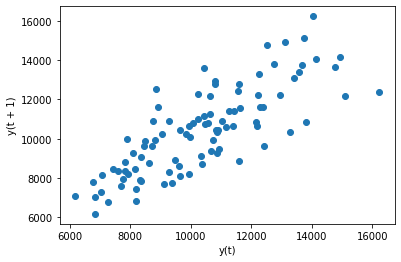

In [64]:
#By default lag_plot will take lag of 1
lag_plot(Mile_DF['MilesMM'])

### Autocorrelation Plots

Creating individual plots with different lag values like lag1, lag2, lag3, lag4 and so on will be a very lenghty and messy process.


###### We can directly get correlation values with all the possible lag values.

In [68]:
from pandas.plotting import autocorrelation_plot

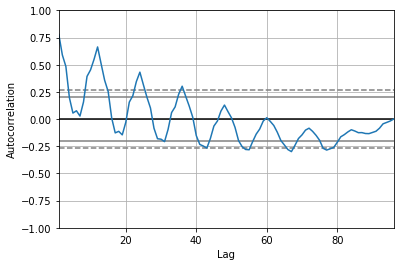

In [69]:
autocorrelation_plot(Mile_DF['MilesMM'])

- Here, we can see that the correlation values are on y axis and lag values on x axis.
- First value is the correlation value between valriable "MilesMM" and lag1 and Second value is the correlation value beteen MilesMM and lag 2. 
* So we have correlation data with upto 90 lag values.

- ###### We can see that there is a high correlation for initial few values (more than 0.50).
- ###### For the first three period the lag values are highly correlated with the 'MilesMM' value
- ###### There is a dip in correlation values with almost every 6 months. This is because of the Seasonality.
